# Honors Project

##### CMSE 202 Section 4

#### By: Ethan Fremder

## Code

##### Import necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import math
import time
from IPython.display import display, clear_output

##### Create get_array function and test it

In [2]:
#the function to get the array that will represent our room
#inputs n (amount of rows), m (amount of columns), population (0-100, the percent of the room that is filled)
#input infect_index is the index of the infected person
def get_array(n,m,population,infect_index):
    
    '''
    the get_array function creates an array to be our 'room'
    the function takes in four arguments: 
    n is the number of rows in the array
    m is the number of columns in the array
    population is the percent of index that contain a 1 (person)
    infect_index is the index of the person with the virus
    this function returns the array of the room
    '''
    
    #assigns variables y and z to be the broken up index of infected person
    y = infect_index[0]
    z = infect_index[1]
    
    #creates an initial array of zeros for size n by m
    array = np.zeros((n,m))
    
    #goes through the array and determines if a person will be assigned to the index
    for i in range(n):
        for j in range(m):
            #assigns x to a random number from 0 to 100
            x = np.random.randint(0,100)

            #checks if the random number fits within the population density
            if x <= population:
                #makes the specific index in the loop =1 (representing a person)
                array[i][j] = 1
    
    #gives the infected value (2) to the index in the array
    array[y,z] = 2
    array = array
                
    return array

In [3]:
#tests the get_array function to make sure it is working properly
infect_index = np.array([1,1])
get_array(5,5,50,infect_index)

array([[0., 1., 0., 0., 1.],
       [0., 2., 0., 1., 1.],
       [0., 1., 0., 0., 1.],
       [1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1.]])

##### Create plot_room function and test it

In [4]:
#this function plots the room, showing where people are and where the infected person is
def plot_room(people_array, marker_size, infect_index):
    
    '''
    the plot_room function plots the room based on the array
    green people are dots and a red x is the infected person
    the function takes in three arguments:
    people_array which is the array that has been created that represents the room
    marker_size which is the size of the marker in the plots
    infect_index which is the index where the person with the virus is
    this function returns the plotted visual of the spread
    '''
    
    #breaks up infected index values into variables y and z
    y = infect_index[0]
    z = infect_index[1]
    
    #loops through each row and each columns to get specific index
    for i in range(people_array.shape[0]):
        for j in range(people_array.shape[1]):
            
            #if the index is one, there is a person there so they are given a green circle it is plotted
            if people_array[i][j] == 1:
                plt.plot(i, j, 'go', markersize = marker_size)
     
    #loops through each row and each columns to get specific index
    for i in range(people_array.shape[0]):
        for j in range(people_array.shape[1]):
            
            #if the index is two, there is an infected person there so they are given a red cross and it is plotted
            if people_array[i][j]==2:
                plt.plot(i,j,'P',color = 'red', markersize = marker_size)
    
    #loops through each row and each columns to get specific index
    for i in range(people_array.shape[0]):
        for j in range(people_array.shape[1]):
            
            #if the index is three, the person is safe due to the precautions they are taking (seen later in the project)
            #plotted with a green circle, similar to people who are not infected
            if people_array[i][j]==3:
                plt.plot(i,j,'go', markersize = marker_size)
                
    #turns off axis labels on the plot
    plt.axis('off')

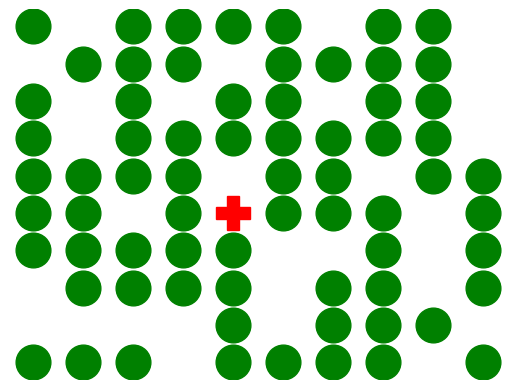

In [5]:
#test of the plot_room function
infect_index = np.array([4,4])
array = get_array(10,10,65,infect_index)
plot_room(array, 25,infect_index)

##### Create in_room and neighbors functions

In [6]:
#the function to check if the index is in the room
#input of i, j, and the array of the room
def in_room(i,j,room):
    
    '''
    the in_room function checks to see if the specific index is in the room
    the function takes in three inputs:
    i for the index i
    j for the index j
    room which is the array representing the room
    this function returns True or False depending on if the index is in the room
    '''
    
    #gets the dimensions of the room
    num_i = room.shape[0]
    num_j = room.shape[1]
    
    #checks to make sure the i and j index are indeed in the room, returns true if it is
    if i >= 0 and i<= num_i-1 and j >= 0 and j <= num_j-1:
        return True
    
    #returns false if the index is not in the room
    else:
        return False

In [7]:
#this function finds the neighbor index and returns all neighbor index that are in the room
#inputs of i, j, and the room array
def neighbors(i,j,room):
    
    '''
    the neighbors function creates a list of index of each neighbor of the input i and j
    the function has three inputs:
    i for the index i that is called
    j for the index j
    room for the room array
    this function returns the list of neighbor indexes
    '''
    
    #calculates the left, up, right, and down neighbor index
    neighbor_calc = [(i-1, j), (i, j-1), (i+1, j), (i, j+1)]
    
    neighbor_index = []
    
    #loops through the neighbor_calc values
    for i in range(len(neighbor_calc)):
        
        #checks if neighbor_calc value is in the array(room)
        if in_room(neighbor_calc[i][0],neighbor_calc[i][1],room):
            
            #adds the index to the neighbor_index list if it is in the room
            neighbor_index.append(room[neighbor_calc[i][0],neighbor_calc[i][1]])
            
    return neighbor_index

##### Create get_new_array function and test it

In [8]:
#this function is the 'update' function, going from the original room to an updated version
#inputs of array which is the array of the room with 0, 1, and 2 values
def get_new_array(array):
    
    '''
    the get_new_array function takes the old array and creates a new one, like an update function
    the only input is the old room array that is getting updated
    this function returns the new updated array
    '''
    
    #creates a new zeros array with exact shape of the original array (the room)
    #np.zeros_like accessed on March 10, 2024 from https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html
    new_array = np.zeros_like(array)
    
    #loops through all rows and columns for an exact index
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            
            #an empty seat is represented by a zero
            #if no one is sitting there, no one will be there in the new array either
            if array[i][j] == 0:
                new_array[i][j] = 0
            
            #a person is represented by a 1
            #if a person is there in the original array, they will be there in the new array
            if array[i][j] == 1:
                new_array[i][j] = 1
                
                #someone with the virus is represented with a 2
                #if any of someone's neighbor has the virus, it will be transmitted to that person
                if 2 in neighbors(i,j,array):
                    new_array[i][j] = 2
            
            #someone with the virus is represented with a 2
            #if someone had the virus in the first array, they will still have it
            if array[i][j] == 2:
                new_array[i][j] = 2
                
    return new_array

In [9]:
#testing get_new_array function with smaller arrays to make sure it works
#also checking the while loop to continue to update the room
x = np.array([[0,1,1],[1,2,1],[0,1,0]])
y = np.array([])

#while loop runs until two arrays are equal, which means there were no more
#updates to the model, thus the spread has stopped
#np.array_equal() accessed March 10, 2024 from https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html
while not np.array_equal(x, y):
    print('X:')
    print(x)
    print('Y')
    print(y)
    y = np.copy(x)
    x = get_new_array(x)
    
print('the final outcome:')
print(x)
print(y)

X:
[[0 1 1]
 [1 2 1]
 [0 1 0]]
Y
[]
X:
[[0 2 1]
 [2 2 2]
 [0 2 0]]
Y
[[0 1 1]
 [1 2 1]
 [0 1 0]]
X:
[[0 2 2]
 [2 2 2]
 [0 2 0]]
Y
[[0 2 1]
 [2 2 2]
 [0 2 0]]
the final outcome:
[[0 2 2]
 [2 2 2]
 [0 2 0]]
[[0 2 2]
 [2 2 2]
 [0 2 0]]


##### Testing the ABM with no precautions

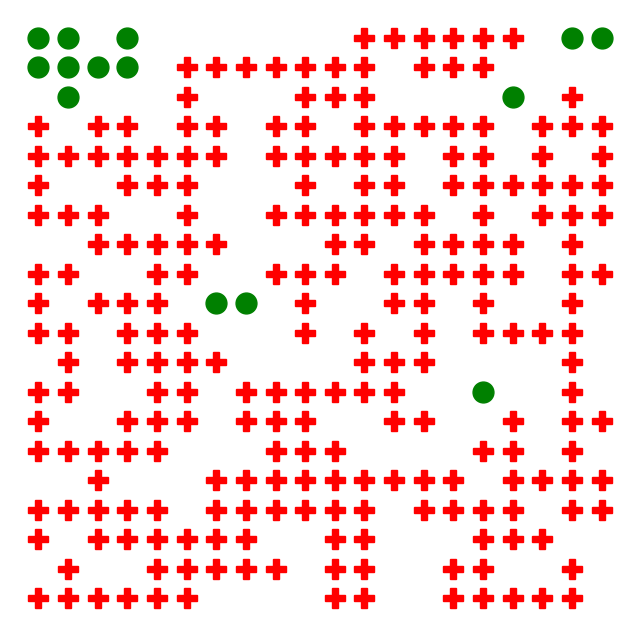

The amount of people infected are: 236
The amount of people safe are: 14
94.4 % of the room ended infected


<Figure size 800x800 with 0 Axes>

In [10]:
#setting the size of the room, how full it is, where the infected will be, and the size of the figure
n = 20
m = 20
population = 60
infect_index = [15,12]
fig = plt.figure(figsize=(8,8))

#use get_array function to set our room
array = get_array(n,m,population,infect_index)

#marker size varies based on how big the board is, trial and error to make sure it looks good
marker = 15

#set up the same array which will update to be the actual array's previous step
same_array = np.array([])

#while loop to update array plot until there are no more updates
while not np.array_equal(array, same_array):
    
    #assigns the array to be the same_array
    same_array = np.copy(array)
    
    #creates the new updated array using the get_array_function
    array = get_new_array(array)
    
    #runs the plot_room function to show the plot
    plot_room(array, marker_size = marker,infect_index=infect_index)
    
    #assigns a quarter second between each update
    #time.sleep() accessed March 12, 2024 from https://www.digitalocean.com/community/tutorials/python-time-sleep
    time.sleep(0.25)
    
    #makes sure the plot is on one plot not creating multiple for each step
    clear_output(wait=True)
    display(fig)
    fig.clear()
    
#the following calculates how many people end infected compared to people in the room
infected = 0
safe = 0
for i in range(array.shape[0]):
    for j in range(array.shape[1]):
        if array[i][j] == 0:
            pass
        if array[i][j] == 1:
            safe += 1
        if array[i][j] == 2:
            infected += 1

percent = infected / (safe + infected) * 100
percent = np.around(percent, 2)
print('The amount of people infected are:', infected)
print('The amount of people safe are:', safe)
print(percent, '% of the room ended infected')

##### Create a model function and test it

In [11]:
#here is a function that only needs the array to run the model
def model(array):
    
    '''
    the model function runs the entire model without needing to call the tedious steps
    the only input for this function is the room array that is being used
    this function returns the visual of the model and prints the stats on it
    '''
    
    same_array = np.array([])
    
    while not np.array_equal(array, same_array):
    
        #assigns the array to be the same_array
        same_array = np.copy(array)

        #creates the new updated array using the get_array_function
        array = get_new_array(array)

        #runs the plot_room function to show the plot
        plot_room(array, marker_size = marker,infect_index=infect_index)

        #assigns a quarter second between each update
        time.sleep(0.25)

        #makes sure the plot outputs as one plot not creating multiple for each step
        clear_output(wait=True)
        display(fig)
        fig.clear()
        
    infected = 0
    safe = 0
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            if array[i][j] == 0:
                pass
            if array[i][j] == 1:
                safe += 1
            if array[i][j] == 2:
                infected += 1
            if array[i][j] == 3:
                safe += 1

    percent = infected / (safe + infected) * 100
    percent = np.around(percent, 2)
    print('The amount of people infected are:', infected)
    print('The amount of people safe are:', safe)
    print(percent, '% of the room ended infected')

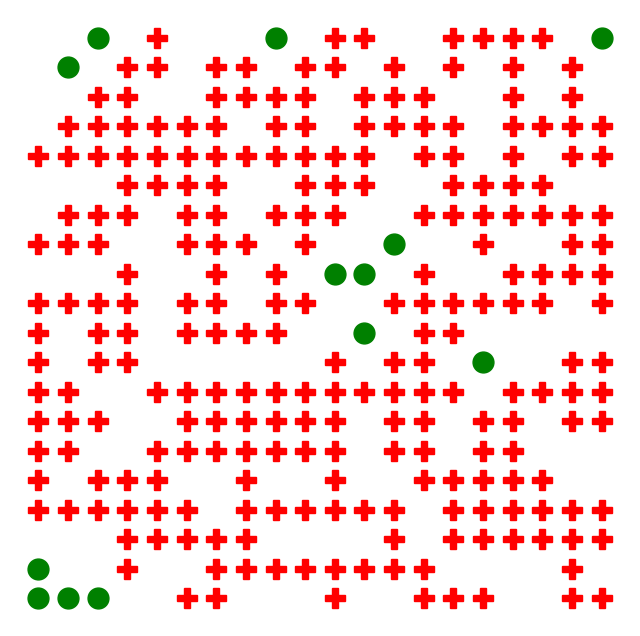

The amount of people infected are: 241
The amount of people safe are: 13
94.88 % of the room ended infected


<Figure size 800x800 with 0 Axes>

In [12]:
#testing the model function
#setting parameters
n = 20
m = 20
population = 60
infect_index = [15,12]
fig = plt.figure(figsize=(8,8))

#get the array
array = get_array(n,m,population,infect_index)

marker = 15
model(array)

##### Impliment precautions into the model and test

In [13]:
#in order to implement precautions, the get_new_array function needs to be tweaked a little
#call the new function new_precaution_array, inputs of array and precaution type
#the precaution types are 'm': masks, 'sd': social distancing, and 'v': vaccinated
def new_precaution_array(array,precaution):
    
    '''
    the new_precaution_array is a function that creates a 'room' with a given precaution level
    there are two inputs for this function:
    array which is the room array
    precaution which is 'm' for masks,  'sd' for social distancing, and 'v' for vaccinated
    this function returns the new array that is updated
    '''
    
    #creates a new zeros array with exact shape of the original array (the room)
    new_array = np.zeros_like(array)
    
    #loops through all rows and columns for an exact index
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            
            #an empty seat is represented by a zero
            #if no one is sitting there, no one will be there in the new array either
            if array[i][j] == 0:
                new_array[i][j] = 0
            
            #a person is represented by a 1
            #if a person is there in the original array, they will be there in the new array
            if array[i][j] == 1:
                new_array[i][j] = 1
                
                #someone with the virus is represented with a 2
                #if any of someone's neighbor has the virus, it will be transmitted to that person
                if 2 in neighbors(i,j,array):
                    
                    ###HERE IS THE CHANGE
                    
                    #if statements to apply precaution prevention rate
                    #if mask precaution is chosen
                    if precaution == 'm':
                        
                        #randomly chooses a number 1-100
                        x = np.random.randint(0,100)
                        
                        #the percent effectiveness of a normal cloth mask is 44% (https://www.cdc.gov/mmwr/volumes/71/wr/mm7106e1.htm)
                        if x <= 44: #if x is less than or equal to 44 (44% chance), the person will not get infected
                            new_array[i][j] = 3 #3 is assigned to the person as their precautions have worked and they will not get infected
                        else:
                            new_array[i][j] = 2
                            
                    #if social distance precaution is chosen
                    if precaution == 'sd':
                        
                        #randomly chooses a number 1-100
                        x = np.random.randint(0,100)
                        
                        #the percent effectiveness is not very clear on social distancing, a wide range of values is reported (https://wwwnc.cdc.gov/eid/article/26/8/20-1093_article)
                        if x <= 50: #because the effectivness ranges so much, 50% will be used here
                            new_array[i][j] = 3
                        else:
                            new_array[i][j] = 2
                    
                    #if vaccine precaution is chosen
                    if precaution == 'v':
                        
                        #randomly chooses a number 1-100
                        x = np.random.randint(0,100)
                        
                        #the percent effectiveness of the vaccine preventing symptoms is 54%(https://www.pbs.org/newshour/health/newest-covid-shots-are-54-percent-effective-in-preventing-symptoms-cdc-finds#:~:text=NEW%20YORK%20(AP)%20—%20The,against%20more%20recent%20coronavirus%20variants.)
                        if x <= 54: #if x is greater than or equal to 54 (54% chance), the person will not get infected
                            new_array[i][j] = 3 #3 is assigned to the person as their precautions have worked and they will not get infected
                        else:
                            new_array[i][j] = 2
            
            #someone with the virus is represented with a 2
            #if someone had the virus in the first array, they will still have it
            if array[i][j] == 2:
                new_array[i][j] = 2
            
            #someone whose precautions kept them safe are represented with a 3
            #if someone was safe in the previous array, they stay safe
            if array[i][j] == 3:
                new_array[i][j] = 3
                
    return new_array

In [14]:
#testing new_precaution_array function with smaller arrays to make sure it works(similar to testing get_new_array function)
x = np.array([[0,1,1],[1,2,1],[0,1,0]])
y = np.array([])

#while loop runs until two arrays are equal, which means there were no more
#updates to the model, thus the spread has stopped
while not np.array_equal(x, y):
    print('X:')
    print(x)
    print('Y')
    print(y)
    y = np.copy(x)
    x = new_precaution_array(x,'v')
    
print('the final outcome:')
print(x)
print(y)

X:
[[0 1 1]
 [1 2 1]
 [0 1 0]]
Y
[]
X:
[[0 3 1]
 [3 2 2]
 [0 3 0]]
Y
[[0 1 1]
 [1 2 1]
 [0 1 0]]
X:
[[0 3 2]
 [3 2 2]
 [0 3 0]]
Y
[[0 3 1]
 [3 2 2]
 [0 3 0]]
the final outcome:
[[0 3 2]
 [3 2 2]
 [0 3 0]]
[[0 3 2]
 [3 2 2]
 [0 3 0]]


In [15]:
#creating a new precaution model to implement the precaution array into
def model_with_precaution(array):
    
    '''
    the model_with_precaution function runs the model with the new precaution array implemented
    the only input is the new precaution array for the room
    this function outputs/returns the visual of the running model and prints the stats
    '''
    
    same_array = np.array([])
    
    while not np.array_equal(array, same_array):
    
        #assigns the array to be the same_array
        same_array = np.copy(array)

        #creates the new updated array using the get_array_function
        array = new_precaution_array(array,precaution)

        #runs the plot_room function to show the plot
        plot_room(array, marker_size = marker,infect_index=infect_index)

        #assigns a quarter second between each update
        time.sleep(0.25)

        #makes sure the plot outputs as one plot not creating multiple for each step
        clear_output(wait=True)
        display(fig)
        fig.clear()
        
    infect = 0
    safe = 0
    #counts the amount of safe and infected people at the end
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            if array[i][j] == 0:
                pass
            if array[i][j] == 1:
                safe += 1
            if array[i][j] == 2:
                infect += 1
            if array[i][j] == 3:
                safe += 1
    
    #calculates and prints the numbers/stats from the model
    percent = infect / (safe + infect) * 100
    percent = np.around(percent, 2)
    print('The amount of people infected are:', infect)
    print('The amount of people safe are:', safe)
    print(percent, '% of the room ended infected')
    return infect

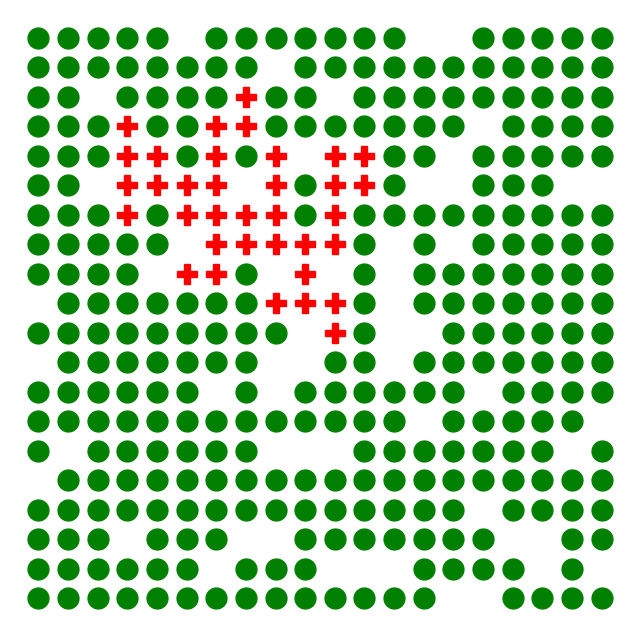

The amount of people infected are: 35
The amount of people safe are: 309
10.17 % of the room ended infected


35

<Figure size 800x800 with 0 Axes>

In [31]:
#test the final model
#setting parameters
#size of room
n = 20
m = 20
#population of room
population = 85
#set where the infected person is
infect_index = [10,10]
#set which precaution type to model
precaution = 'sd'
fig = plt.figure(figsize=(8,8))

#get the array
array = get_array(n,m,population,infect_index)

marker = 15
model_with_precaution(array)

##### Create the get_infect function

In [18]:
#in order to create a large enough dataframe to analyze results from the model, i created this function
#this function runs the model but does not plot the spread (saves time), it only returns the amount of people infected
#the get_infect function takes in one argument, which is the array of the room
def get_infect(array):
    
    '''
    the get_infect function returns the amount of infected people at the end of the model without plotting it
    the only input needed is the array of the room
    this function returns the amount of people infected through one run of the model
    '''
    
    same_array = np.array([])
    
    while not np.array_equal(array, same_array):
        
        same_array = np.copy(array)

        array = new_precaution_array(array,precaution)
        
    infect = 0
    safe = 0
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            if array[i][j] == 0:
                pass
            if array[i][j] == 1:
                safe += 1
            if array[i][j] == 2:
                infect += 1
            if array[i][j] == 3:
                safe += 1
                
    return infect

##### Collecting and recording data from model results

In [19]:
#this code chunk runs the model with precaution 'vaccinated' and records data for 100 cycles on each population (70,80,90,100)
#setting parameters
#size of room
n = 20
m = 20

infect_index = [10,10]
#sets the precaution type to vaccinated
precaution = 'v'

#sets the population to 70
population = 70
array = get_array(n,m,population,infect_index)
vac_70 = []
#this for loop runs through the model 100 times and adds the amount of people infected each time to the list
for i in range(100):
    vac_70.append(get_infect(array))

#sets the population to 80
population = 80
array = get_array(n,m,population,infect_index)
vac_80 = []
#this for loop runs through the model 100 times and adds the amount of people infected each time to the list
for i in range(100):
    vac_80.append(get_infect(array))

#sets the population to 90
population = 90
array = get_array(n,m,population,infect_index)
vac_90 = []
#this for loop runs through the model 100 times and adds the amount of people infected each time to the list
for i in range(100):
    vac_90.append(get_infect(array))

#sets the population to 100
population = 100
array = get_array(n,m,population,infect_index)
vac_100 = []
#this for loop runs through the model 100 times and adds the amount of people infected each time to the list
for i in range(100):
    vac_100.append(get_infect(array))

In [20]:
#this code chunk runs the model with precaution 'masked' and records data for 100 cycles on each population 
#setting parameters
#size of room
n = 20
m = 20

infect_index = [10,10]
#sets precaution to masked
precaution = 'm'


population = 70
array = get_array(n,m,population,infect_index)
mask_70 = []
for i in range(100):
    mask_70.append(get_infect(array))

population = 80
array = get_array(n,m,population,infect_index)
mask_80 = []
for i in range(100):
    mask_80.append(get_infect(array))

population = 90
array = get_array(n,m,population,infect_index)
mask_90 = []
for i in range(100):
    mask_90.append(get_infect(array))

population = 100
array = get_array(n,m,population,infect_index)
mask_100 = []
for i in range(100):
    mask_100.append(get_infect(array))

In [21]:
#this code chunk runs the model with precaution 'social distanced' and records data for 100 cycles on each population 
#setting parameters
n = 20
m = 20

infect_index = [10,10]
#set social distanced as the precaution
precaution = 'sd'


population = 70
array = get_array(n,m,population,infect_index)
sd_70 = []
for i in range(100):
    sd_70.append(get_infect(array))

population = 80
array = get_array(n,m,population,infect_index)
sd_80 = []
for i in range(100):
    sd_80.append(get_infect(array))

population = 90
array = get_array(n,m,population,infect_index)
sd_90 = []
for i in range(100):
    sd_90.append(get_infect(array))

population = 100
array = get_array(n,m,population,infect_index)
sd_100 = []
for i in range(100):
    sd_100.append(get_infect(array))

#these lines create lists for population size to match the data
#creating lsit with *100 accessed March 16, 2024 from https://stackoverflow.com/questions/3459098/create-list-of-single-item-repeated-n-times
pop70 = [70]*100
pop80 = [80]*100
pop90 = [90]*100
pop100 = [100]*100

##### Bring all data together into a dataframe

In [22]:
#combines all lists created to add them to the dataframe
sd_data = sd_70+sd_80+sd_90+sd_100
mask_data = mask_70+mask_80+mask_90+mask_100
vac_data = vac_70+vac_80+vac_90+vac_100
pop_data = pop70+pop80+pop90+pop100

#creates a dictionary to then convert to dataframe
model_results = {'vac_inf':vac_data,
           'mask_inf':mask_data,
           'sd_inf':sd_data,
           'percent_pop':pop_data}

#converts data to dataframe and shows it
model_results = pd.DataFrame(model_results)
model_results.head()

,vac_inf,mask_inf,sd_inf,percent_pop
0,8,2,9,70
1,10,2,12,70
2,16,2,4,70
3,1,5,1,70
4,3,2,7,70


In [23]:
#masks the data based on the percent population
data70 = model_results[model_results['percent_pop']==70]
data80 = model_results[model_results['percent_pop']==80]
data90 = model_results[model_results['percent_pop']==90]
data100 = model_results[model_results['percent_pop']==100]

#drops the percent population column
data70 = data70.drop(columns = ['percent_pop'])
data80 = data80.drop(columns = ['percent_pop'])
data90 = data90.drop(columns = ['percent_pop'])
data100 = data100.drop(columns = ['percent_pop'])

##### Get summary statistics of each population

In [24]:
#gives summary statistics on the 70% populated results
data70.describe()

,vac_inf,mask_inf,sd_inf
count,100.000000,100.000000,100.000000
mean,6.660000,5.240000,8.190000
std,5.997003,6.307155,5.609687
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,4.500000,2.000000,7.000000
75%,9.000000,6.000000,12.000000
max,28.000000,40.000000,22.000000


In [25]:
#gives summary statistics on the 80% populated results
data80.describe()

,vac_inf,mask_inf,sd_inf
count,100.000000,100.00000,100.000000
mean,9.240000,23.52000,9.750000
std,8.503261,15.77524,11.016402
min,1.000000,1.00000,1.000000
25%,3.000000,11.00000,3.000000
50%,7.500000,22.50000,6.000000
75%,12.000000,34.25000,10.000000
max,37.000000,82.00000,60.000000


In [26]:
##gives summary statistics on the 90% populated results
data90.describe()

,vac_inf,mask_inf,sd_inf
count,100.000000,100.000000,100.00000
mean,14.210000,45.930000,17.28000
std,15.423513,36.725918,15.45935
min,1.000000,1.000000,1.00000
25%,2.750000,17.500000,5.00000
50%,10.000000,40.000000,14.00000
75%,19.000000,66.000000,26.00000
max,74.000000,172.000000,66.00000


In [27]:
#gives summary statistics on the 100% populated results
data100.describe()

,vac_inf,mask_inf,sd_inf
count,100.000000,100.000000,100.000000
mean,17.790000,71.620000,38.820000
std,17.565057,50.991538,32.273572
min,1.000000,1.000000,1.000000
25%,3.750000,29.000000,9.000000
50%,12.000000,69.000000,34.500000
75%,27.250000,104.250000,63.000000
max,83.000000,190.000000,129.000000


##### Visualize data

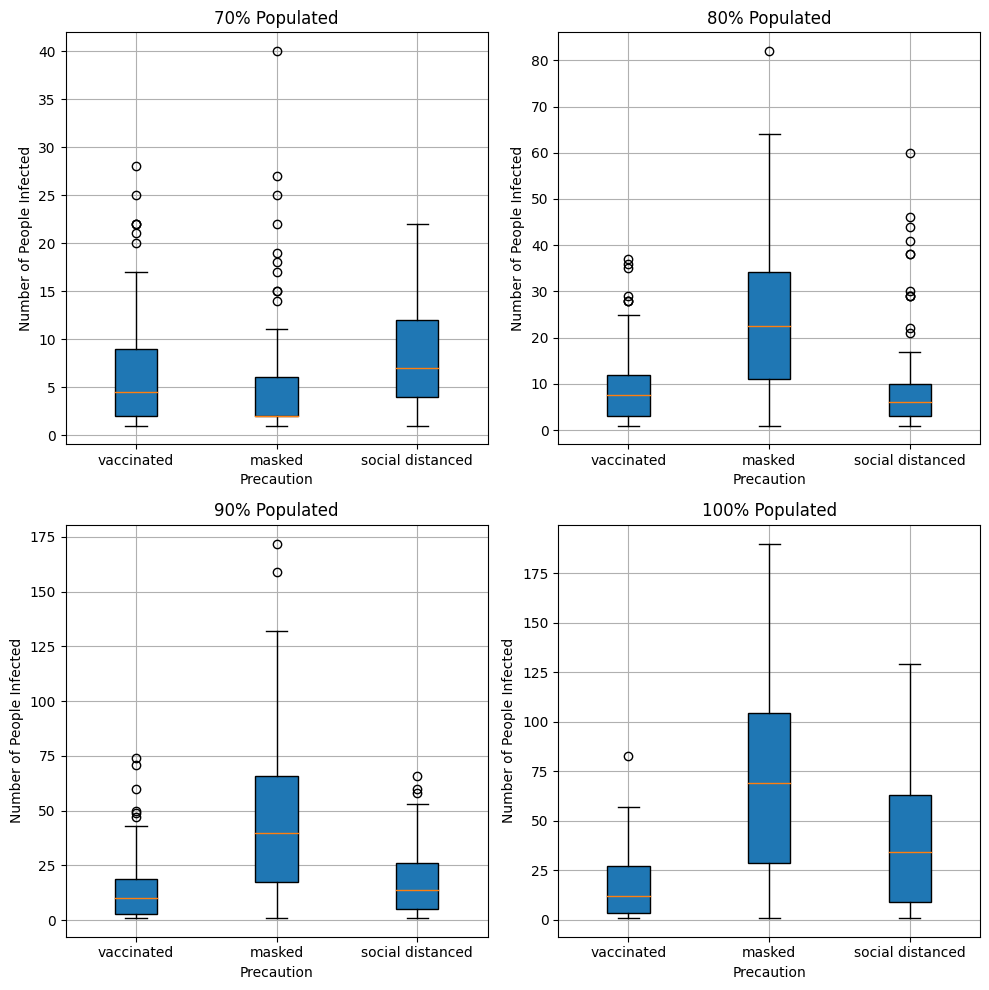

In [28]:
#makes the figure large enough to better show the subplots
fig = plt.figure(figsize=(10,10))

#subplot one, 70%
plt.subplot(2,2,1)
#patch_artist = True accessed March 16, 2024 from https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color#:~:text=To%20colorize%20the%20boxplot%2C%20you,props%20keyword%20argument%2C%20e.g.
plt.boxplot(data70, patch_artist = True);
plt.title('70% Populated')
plt.ylabel('Number of People Infected')
plt.xlabel('Precaution')
plt.xticks([1, 2, 3],['vaccinated','masked','social distanced']);
plt.grid()

#subplot 2, 80%
plt.subplot(2,2,2)
plt.boxplot(data80, patch_artist = True);
plt.title('80% Populated')
plt.ylabel('Number of People Infected')
plt.xlabel('Precaution')
plt.xticks([1, 2, 3],['vaccinated','masked','social distanced']);
plt.grid()

#subplot 3, 90%
plt.subplot(2,2,3)
plt.boxplot(data90, patch_artist = True);
plt.title('90% Populated')
plt.ylabel('Number of People Infected')
plt.xlabel('Precaution')
plt.xticks([1, 2, 3],['vaccinated','masked','social distanced']);
plt.grid()

#subplot 4, 100%
plt.subplot(2,2,4)
plt.boxplot(data100, patch_artist = True);
plt.title('100% Populated')
plt.ylabel('Number of People Infected')
plt.xlabel('Precaution')
plt.xticks([1, 2, 3],['vaccinated','masked','social distanced']);
plt.grid()
plt.tight_layout()

In [29]:
#create a jitter on the percent_pop numbers to get a better looking scatter plot
jit_perc_pop = []
for i in range(len(model_results['percent_pop'])):
    #gets the jitter value from -2 to 2
    jitter = random.uniform(-3,3)
    #adds the jitter to the value from the model_results population value
    jit_perc_pop.append(model_results['percent_pop'][i] + jitter)

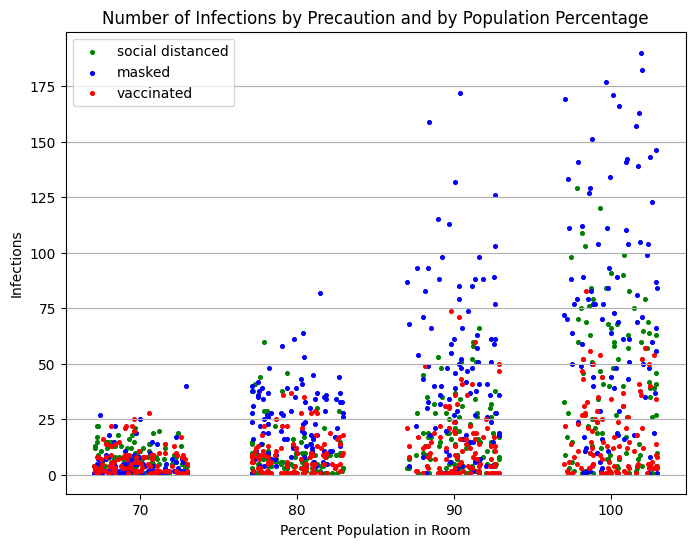

In [30]:
fig = plt.figure(figsize = (8,6))
plt.scatter(jit_perc_pop,model_results['sd_inf'],color = 'green',label='social distanced',s=7)
plt.scatter(jit_perc_pop,model_results['mask_inf'],color = 'blue',label='masked',s=7)
plt.scatter(jit_perc_pop,model_results['vac_inf'],color = 'red',label='vaccinated',s=7)
plt.xlabel('Percent Population in Room')
plt.ylabel('Infections')
plt.title('Number of Infections by Precaution and by Population Percentage')
plt.xticks([70,80,90,100])
plt.legend()
plt.grid(axis='y')